In [1]:
import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
import os
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D,MaxPooling2D,Flatten,Conv1D
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

import json
import numpy as np
import pandas as pd
from sklearn import preprocessing
import keras
from keras.layers import Input,Dense,Lambda
from keras.models import Model
import os
import numpy as np
from keras.preprocessing import image as image_p
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.vgg16 import VGG16
import time
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import pickle
import matplotlib.image as mpimg
from keras.preprocessing import image
from  matplotlib import pyplot
from keras.layers.normalization import BatchNormalization
import cv2
import seaborn as sns
import random
from PIL import Image
from sklearn.utils import class_weight
from keras.layers import Reshape
import keras.backend as K
import math


#import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
import os
from sklearn.model_selection import train_test_split


import json
import numpy as np
import pandas as pd
from sklearn import preprocessing
import os
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.image as mpimg
from  matplotlib import pyplot
import cv2
import random
from PIL import Image
from sklearn.utils import class_weight
import numpy
import codecs
import xmltodict

import imgaug as ia
from imgaug import augmenters as iaa
import math



import json
import numpy as np
import pandas as pd
from sklearn import preprocessing
import keras
from keras.layers import Input,Dense,Lambda,RepeatVector,Dot
from keras.models import Model
import os
import numpy as np
from keras.preprocessing import image as image_p
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.vgg16 import VGG16
import time
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import pickle
import matplotlib.image as mpimg
from keras.preprocessing import image
from  matplotlib import pyplot
from keras.layers.normalization import BatchNormalization
import cv2
import seaborn as sns
import random
from PIL import Image
from sklearn.utils import class_weight
from keras.layers import Reshape,merge,Concatenate,Add,Dropout
import keras.backend as K
import math
from keras.activations import softmax,tanh
import tensorflow as tf
from keras.applications.vgg16 import VGG16


from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D,MaxPooling2D,Flatten,Conv1D,Softmax
from keras.preprocessing import sequence

Using TensorFlow backend.


In [2]:
# !pip install keras
#num_labels = len(np.unique(labels))

def iou_metric(y_true, y_pred):
    # iou as metric for bounding box regression
    # input must be as [x1, y1, x2, y2]
    
    # AOG = Area of Groundtruth box
    AoG = K.abs(K.transpose(y_true)[2] - K.transpose(y_true)[0] + 1) * K.abs(K.transpose(y_true)[3] - K.transpose(y_true)[1] + 1)
    
    # AOP = Area of Predicted box
    AoP = K.abs(K.transpose(y_pred)[2] - K.transpose(y_pred)[0] + 1) * K.abs(K.transpose(y_pred)[3] - K.transpose(y_pred)[1] + 1)

    # overlaps are the co-ordinates of intersection box
    overlap_0 = K.maximum(K.transpose(y_true)[0], K.transpose(y_pred)[0])
    overlap_1 = K.maximum(K.transpose(y_true)[1], K.transpose(y_pred)[1])
    overlap_2 = K.minimum(K.transpose(y_true)[2], K.transpose(y_pred)[2])
    overlap_3 = K.minimum(K.transpose(y_true)[3], K.transpose(y_pred)[3])

    # intersection area
    intersection = (overlap_2 - overlap_0 + 1) * (overlap_3 - overlap_1 + 1)

    # area of union of both boxes
    union = AoG + AoP - intersection
    
    # iou calculation
    iou = intersection / union

    # bounding values of iou to (0,1)
    iou = K.clip(iou, 0.0 + K.epsilon(), 1.0 - K.epsilon())

    return iou    

In [3]:
class CustomModelCheckpoint(ModelCheckpoint):
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        self.epochs_since_last_save += 1
        if self.epochs_since_last_save >= self.period:
            self.epochs_since_last_save = 0
            filepath = self.filepath.format(epoch=epoch + 1, **logs)
            if self.save_best_only:
                current = logs.get(self.monitor)
                if current is None:
                    warnings.warn('Can save best model only with %s available, '
                                  'skipping.' % (self.monitor), RuntimeWarning)
                else:
                    if self.monitor_op(current, self.best):
                        if self.verbose > 0:
                            print('\nEpoch %05d: %s improved from %0.5f to %0.5f,'
                                  ' saving model to %s'
                                  % (epoch + 1, self.monitor, self.best,
                                     current, filepath))
                        self.best = current
                        if self.save_weights_only:
                            #self.model.save_weights(filepath, overwrite=True)
                            print("asd")
                            try:
                                with open(filepath,'wb') as f:
                                    pickle.dump(self.model.get_weights(),f)
                            except Exception as ex:
                                print("Could not write",ex)
                        else:
                            self.model.save(filepath, overwrite=True)
                    else:
                        if self.verbose > 0:
                            print('\nEpoch %05d: %s did not improve from %0.5f' %
                                  (epoch + 1, self.monitor, self.best))
            else:
                if self.verbose > 0:
                    print('\nEpoch %05d: saving model to %s' % (epoch + 1, filepath))
                if self.save_weights_only:
                    self.model.save_weights(filepath, overwrite=True)
                else:
                    self.model.save(filepath, overwrite=True)

In [4]:
# !pip install keras
#num_labels = len(np.unique(labels))

def iou_metric(y_true, y_pred):
    # iou as metric for bounding box regression
    # input must be as [x1, y1, x2, y2]
    
    # AOG = Area of Groundtruth box
    AoG = K.abs(K.transpose(y_true)[2] - K.transpose(y_true)[0] + 1) * K.abs(K.transpose(y_true)[3] - K.transpose(y_true)[1] + 1)
    
    # AOP = Area of Predicted box
    AoP = K.abs(K.transpose(y_pred)[2] - K.transpose(y_pred)[0] + 1) * K.abs(K.transpose(y_pred)[3] - K.transpose(y_pred)[1] + 1)

    # overlaps are the co-ordinates of intersection box
    overlap_0 = K.maximum(K.transpose(y_true)[0], K.transpose(y_pred)[0])
    overlap_1 = K.maximum(K.transpose(y_true)[1], K.transpose(y_pred)[1])
    overlap_2 = K.minimum(K.transpose(y_true)[2], K.transpose(y_pred)[2])
    overlap_3 = K.minimum(K.transpose(y_true)[3], K.transpose(y_pred)[3])

    # intersection area
    intersection = (overlap_2 - overlap_0 + 1) * (overlap_3 - overlap_1 + 1)

    # area of union of both boxes
    union = AoG + AoP - intersection
    
    # iou calculation
    iou = intersection / union

    # bounding values of iou to (0,1)
    iou = K.clip(iou, 0.0 + K.epsilon(), 1.0 - K.epsilon())

    return iou    

In [5]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3154919289107188047, name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 5759922924951767442
 physical_device_desc: "device: XLA_GPU device", name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 4341377270675065689
 physical_device_desc: "device: XLA_CPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 5644877824
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 3392037225939758041
 physical_device_desc: "device: 0, name: GeForce GTX 1060 with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 6.1"]

In [6]:
def process_image_keypoints(img,bbox_coords):
    desired_size = 224

    old_size = img.shape

    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])

    # new_size should be in (width, height) format

    im = cv2.resize(img, (new_size[1], new_size[0]))

    delta_w = desired_size - new_size[1]
    delta_h = desired_size - new_size[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)

    color = [0, 0, 0]
    new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
        value=color)

    bbox_coordinates = []
    for a,b in bbox_coords:
        a = float(a)*ratio
        b = float(b)*ratio
        bbox_coordinates.append([a+left,b+top])
    return new_im,bbox_coordinates

In [7]:
def process_image_keypoints_nobox(img):
    desired_size = 224

    old_size = img.shape

    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])

    # new_size should be in (width, height) format

    im = cv2.resize(img, (new_size[1], new_size[0]))

    delta_w = desired_size - new_size[1]
    delta_h = desired_size - new_size[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)

    color = [0, 0, 0]
    new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
        value=color)

    return new_im,[left,top,ratio]

In [34]:
count_correct = 0
count_wrong = 0
images = []
bboxes = []
image_sizes = []
image_names = []
for file in os.listdir("/tf/data/ab_annotations/"):
    try:
        with open('/tf/data/ab_annotations/'+file,'r') as f:
            text = f.read()
            d = xmltodict.parse(text)
        path = d['annotation']['path']
        rel_path = "/home/parmeet/Pictures/"
        
        #print(path.split(rel_path))
        path = path.split(rel_path)[1]
        path = "/tf/data/" + path
        bgr_img = cv2.imread(path)
        img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
        
        obj = d['annotation']['object'][0] if isinstance(d['annotation']['object'],list) else d['annotation']['object']
        bbox = obj['bndbox']                
        bbox_coords = [(bbox['xmin'],bbox['ymin']),(bbox['xmax'],bbox['ymax'])]


        img,bbox_coords = process_image_keypoints(img,bbox_coords)
        bbs = ia.BoundingBoxesOnImage([
            ia.BoundingBox(x1=bbox_coords[0][0], y1=bbox_coords[0][1], x2=bbox_coords[1][0], y2=bbox_coords[1][1])
        ], shape=img.shape)

        images.append(img)
        bboxes.append(bbs)
        count_correct += 1
    except Exception as ex:
        print(ex)
        count_wrong += 1

OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.

OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'



In [37]:
sometimes = lambda aug: iaa.Sometimes(0.5, aug)
seq = iaa.Sequential(
    [
        iaa.Fliplr(0.5), # horizontally flip 50% of all images
        iaa.Flipud(0.5), # vertically flip 50% of all images
        sometimes(iaa.Affine(
            #translate_percent={"x": (-0.01, 0.01), "y": (-0.01, 0.01)}, # translate by -20 to +20 percent (per axis)
            #rotate=(-5, 5), # rotate by -45 to +45 degrees
            order=[0, 1], # use nearest neighbour or bilinear interpolation (fast)
            cval=(0, 255), # if mode is constant, use a cval between 0 and 255
            mode=ia.ALL # use any of scikit-image's warping modes (see 2nd image from the top for examples)
        )),
        iaa.SomeOf((0, 5),
            [
                iaa.Sharpen(alpha=(0, 1.0), lightness=(0.75, 1.5)), # sharpen images
                #iaa.Add((-10, 10), per_channel=0.5), # change brightness of images (by -10 to 10 of original value)
                iaa.ContrastNormalization((0.9, 1.10), per_channel=0.5), # improve or worsen the contrast
            ],
            random_order=True
        )
    ],
    random_order=True
)

In [38]:
def augment_images(images,bboxes,times):
    all_bboxes = []
    
    
    images = [(x[:,:,:] * 255.0).astype(np.uint8) for x in images]
    all_images = list(images)
    
    for bbs in bboxes:
            all_bboxes.append(np.array([bbs.bounding_boxes[0].x1,bbs.bounding_boxes[0].y1,bbs.bounding_boxes[0].x2,bbs.bounding_boxes[0].y2]))
    #print(len(all_images))
    #print(len(all_bboxes))
    
    for i in range(times):
        seq_det = seq.to_deterministic()
        image_aug = seq_det.augment_images(images)
        bbs_aug = seq_det.augment_bounding_boxes(bboxes)
        for bbs in bbs_aug:
            all_bboxes.append(np.array([bbs.bounding_boxes[0].x1,bbs.bounding_boxes[0].y1,bbs.bounding_boxes[0].x2,bbs.bounding_boxes[0].y2]))
        
        all_images = all_images + list(image_aug)
        #all_image_sizes = all_image_sizes + list(image_sizes)
    all_images = [(x[:,:,:] / 255.0).astype(np.float64) for x in all_images]
    return all_images,all_bboxes

In [39]:
X_normalized = [(x[:,:,:].astype(np.float64)) / 255.0 for x in images]
X_train, X_test, y_train, y_test = train_test_split(X_normalized,bboxes,test_size=0.33,random_state=42,shuffle=True)
test_bboxes = []
for bbs in list(y_test):
    test_bboxes.append(np.array([bbs.bounding_boxes[0].x1,bbs.bounding_boxes[0].y1,bbs.bounding_boxes[0].x2,bbs.bounding_boxes[0].y2]))
    
train_images,train_bboxes = augment_images(X_train,y_train,2)

In [8]:
cnn_base = VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')

for layer in cnn_base.layers:
    if layer.name=='block5_conv3':
        break
    layer.trainable = False

x = cnn_base.get_layer('block5_pool').output
x = Conv2D(128, kernel_size=(3, 3), padding="same")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.2)(x)
x = Conv2D(128, kernel_size=(3, 3), padding="same")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.2)(x)
x = Conv2D(4, kernel_size=(1, 1), padding="same")(x)
x = Reshape((4,),name='localization_output')(x)


model = Model(inputs=cnn_base.input, outputs=x)
model.compile(loss="mean_squared_error", optimizer="adam", metrics=['accuracy',iou_metric])
initial_weights = model.get_weights()

W0411 05:36:33.049444 140169956075264 deprecation.py:506] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
# model.summary()

In [48]:
try:
    with open('vgg16-ab-box-weights.hd5','rb') as f:
        model_weights = pickle.load(f)
        model.set_weights(model_weights)
        print("loaded weights")
except:
    print("not present")
checkpoint = CustomModelCheckpoint('vgg16-ab-box-weights.hd5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True,mode='min')
callbacks_list = [checkpoint]
history = model.fit(np.array(train_images),np.array(train_bboxes),validation_data=(np.array(X_test),np.array(test_bboxes)),epochs=20,batch_size=5,callbacks=callbacks_list)

not present
Train on 456 samples, validate on 75 samples
Epoch 1/20
456/456 [==============================] - 10s 22ms/step - loss: 1383.8131 - acc: 0.9101 - iou_metric: 0.4146 - val_loss: 441.6838 - val_acc: 1.0000 - val_iou_metric: 0.5397

Epoch 00001: val_loss improved from inf to 441.68378, saving model to vgg16-ab-box-weights.hd5
asd
Epoch 2/20
456/456 [==============================] - 7s 16ms/step - loss: 448.3880 - acc: 0.9408 - iou_metric: 0.5207 - val_loss: 740.4396 - val_acc: 1.0000 - val_iou_metric: 0.4544

Epoch 00002: val_loss did not improve from 441.68378
Epoch 3/20
456/456 [==============================] - 7s 16ms/step - loss: 364.8287 - acc: 0.9276 - iou_metric: 0.5602 - val_loss: 117.9840 - val_acc: 1.0000 - val_iou_metric: 0.7190

Epoch 00003: val_loss improved from 441.68378 to 117.98396, saving model to vgg16-ab-box-weights.hd5
asd
Epoch 4/20
456/456 [==============================] - 7s 16ms/step - loss: 268.1623 - acc: 0.9452 - iou_metric: 0.6053 - val_loss: 1

In [49]:
with open('vgg16-ab-box-weights.hd5','rb') as f:
    model_weights = pickle.load(f)
    model.set_weights(model_weights)
    print("loaded weights")

loaded weights


In [9]:
df = pd.read_csv('/tf/data/labels.csv')
labels_dict = {}

for idx,row in df.iterrows():
    labels_dict[row['id']] = row['ab']

In [10]:
count_correct = 0
count_wrong = 0
images = []
labels = []
image_sizes = []
image_names = []


# folders = ['/tf/data/aggression/tangier_lobster/']
# for folder in folders:
#     for file in os.listdir(folder):
#         try:
#             bgr_img = cv2.imread(folder+"/"+file)
#             img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
#             label = file.split(".")[0].split("_")[0]
            
#             img_temp,corr = process_image_keypoints_nobox(img)
#             img_temp = (img_temp[:,:,:] / 255.0).astype(np.float64)
            
#             [[xmin,ymin,xmax,ymax]] = model.predict(np.expand_dims(img_temp,0))
#             [left,top,ratio] = corr
#             xmin,xmax = (xmin - left)/ratio,(xmax - left)/ratio
#             ymin,ymax = (ymin - top)/ratio,(ymax - top)/ratio            
            
#             img = img[int(ymin):int(ymax),int(xmin):int(xmax),:]
#             image_temp,_= process_image_keypoints_nobox(img)
#             if 'visit1'+label in labels_dict:
#                 images.append(image_temp)
#                 labels.append(labels_dict['visit1'+label])
#             count_correct += 1
#         except Exception as ex:
#             print(ex)
#             count_wrong += 1

folders = ['/tf/data/side-view/tangier-visit2']
for folder in folders:
    for file in os.listdir(folder):
        try:
            bgr_img = cv2.imread(folder+"/"+file)
            label = file.split(".")[0].split("_")[0]
            #print(label)
            
            img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
            img_temp,corr = process_image_keypoints_nobox(img)
            img_temp = (img_temp[:,:,:] / 255.0).astype(np.float64)
            
            [[xmin,ymin,xmax,ymax]] = model.predict(np.expand_dims(img_temp,0))
            [left,top,ratio] = corr
            xmin,xmax = (xmin - left)/ratio,(xmax - left)/ratio
            ymin,ymax = (ymin - top)/ratio,(ymax - top)/ratio            
            
            img = img[int(ymin):int(ymax),int(xmin):int(xmax),:]
            image_temp,_= process_image_keypoints_nobox(img)
            #if label in labels_dict:
            images.append(image_temp)
            labels.append(labels_dict[int(label)])
            count_correct += 1
        except Exception as ex:
            print(ex)
            count_wrong += 1

OpenCV(4.0.0) /io/opencv/modules/imgproc/src/resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.0.0) /io/opencv/modules/imgproc/src/resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.0.0) /io/opencv/modules/imgproc/src/resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.0.0) /io/opencv/modules/imgproc/src/resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.0.0) /io/opencv/modules/imgproc/src/resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.0.0) /io/opencv/modules/imgproc/src/resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.0.0) /io/opencv/modules/imgproc/src/resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.0.0) /io/opencv/modules/imgproc/src/resize.cpp:3784: error: (-215:Assertion faile

OpenCV(4.0.0) /io/opencv/modules/imgproc/src/resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.0.0) /io/opencv/modules/imgproc/src/resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.0.0) /io/opencv/modules/imgproc/src/resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.0.0) /io/opencv/modules/imgproc/src/resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.0.0) /io/opencv/modules/imgproc/src/resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.0.0) /io/opencv/modules/imgproc/src/resize.cpp:3785: error: (-215:Assertion failed) !dsize.empty() || (inv_scale_x > 0 && inv_scale_y > 0) in function 'resize'

OpenCV(4.0.0) /io/opencv/modules/imgproc/src/resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.0.0) /io/opencv/modules/imgproc/src/resiz

In [36]:
sum([lab==1.0 for lab in labels])

46

In [52]:
def augment_images(images,labels,times):
    
    images = [(x[:,:,:] * 255.0).astype(np.uint8) for x in images]
    
    all_images = list(images)
    all_labels = list(labels)
    
    
    
    for i in range(times):
        seq_det = seq.to_deterministic()
        image_aug = seq_det.augment_images(images)
        all_images = all_images + list(image_aug)
        all_labels = all_labels + list(labels)        
    all_images = [(x[:,:,:] / 255.0).astype(np.float64) for x in all_images]
    return all_images,all_labels

In [53]:
labs = []
for i in labels:
    if i==1.0:
        labs.append(1)
    else:
        labs.append(0)

In [54]:
images_temp = [(x[:,:,:] / 255.0).astype(np.float64) for x in images]

from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=5,shuffle=False,random_state=100)
test_cvscores = []
validation_cvscores = []
fusion_model_info = []
kfold_data = []

i = 0
for train, test in kf.split(images_temp,labs):
    i = i + 1
    print(i)
    train_images,train_labels = augment_images(np.array(images_temp)[train],np.array(labs)[train],2)
    kfold_data.append([train_images,train_labels,np.array(images_temp)[test],np.array(labs)[test]])

1
2
3
4
5


In [55]:
with open('data-ab0.pckl','wb') as file:
    pickle.dump(kfold_data[0],file)
with open('data-ab1.pckl','wb') as file:
    pickle.dump(kfold_data[1],file)
with open('data-ab2.pckl','wb') as file:
    pickle.dump(kfold_data[2],file)
with open('data-ab3.pckl','wb') as file:
    pickle.dump(kfold_data[3],file)
with open('data-ab4.pckl','wb') as file:
    pickle.dump(kfold_data[4],file)

In [27]:
with open('data-ab0.pckl','rb') as file:
        train_images,train_labels,test_images,test_labels = pickle.load(file)

In [34]:
len(test_images)

46

In [27]:
def attention_block(x,K,labels,w,h):
    H = Conv2D(K, kernel_size=(w, h), padding="same")(x)
    H = BatchNormalization()(H)
    spatial_softmax = Lambda(lambda x:softmax(H,axis=3))(H)
    O = Conv2D(labels*K, kernel_size=(w, h), padding="same")(x)
    O = BatchNormalization()(O)
    rH = Lambda(lambda x:keras.backend.repeat_elements(x, rep=labels, axis=3))(spatial_softmax)
    o = Lambda(lambda x: tf.einsum('bijk,bijk->bk',x[0],x[1]))([O,rH])
    tempH = Conv2D(K, kernel_size=(w, h), padding="same")(x)
    tempH = BatchNormalization()(tempH)
    gh = Lambda(lambda x: softmax(tanh(tf.einsum('bijk,bijk->bk',x[0],x[1])),axis=1))([tempH,spatial_softmax])
    rgh = Lambda(lambda x:keras.backend.repeat_elements(x, rep=labels, axis=1))(gh)
    of = Lambda(lambda x: tf.einsum('bk,bk->bk',x[0],x[1]))([rgh,o])
    new_shape = Reshape((labels,K))(of)
    out = Lambda(lambda x: keras.backend.sum(x,axis=2))(new_shape)
    out = BatchNormalization()(out)
    out = Dense(labels,activation='sigmoid')(out)
    #x = Conv2D(K, kernel_size=(w, h), padding="same")(x)
    #inter = Lambda(lambda x: Flatten()(keras.backend.mean(x,axis=3)))(x)
    inter = Conv2D(128, kernel_size=(w, h), padding="same")(x)
    inter = MaxPooling2D(pool_size=(2, 2))(inter)
    inter = BatchNormalization()(inter)
    inter = Conv2D(128, kernel_size=(w, h), padding="same")(inter)
    inter = MaxPooling2D(pool_size=(2, 2))(inter)
    inter = BatchNormalization()(inter)
    print(inter.shape)
    inter = Conv2D(1, kernel_size=(w, h), padding="same")(inter)
    inter = Flatten()(inter)
    weight = Dense(labels,activation='tanh')(inter)
    return out,weight

In [7]:
K = 1
labels = 1
w,h = 3,3

cnn_base = VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')

for layer in cnn_base.layers:
    #if layer.name=='block5_conv3':
        #break
    layer.trainable = False


x = cnn_base.get_layer('block3_conv3').output
final1,weight1 = attention_block(x,K,labels,w,h)
#final1 = Lambda(lambda x: tf.einsum('bk,bk->bk',x[0],x[1]))([final1,weight1])

x = cnn_base.get_layer('block4_conv3').output
final2,weight2 = attention_block(x,K,labels,w,h)

#final2 = Lambda(lambda x: tf.einsum('bk,bk->bk',x[0],x[1]))([final2,weight2])

x = cnn_base.get_layer('block5_pool').output
inter = Lambda(lambda x: Flatten()(x[:,:,:,0]))(x)
weight3 = Dense(1,activation='tanh')(inter)

x = Flatten()(x)
x = Dense(64,activation='tanh')(x)
x = BatchNormalization()(x)
x = Dense(64,activation='tanh')(x)
x = BatchNormalization()(x)
x = Dense(1,activation='sigmoid')(x)


weight_concat = Concatenate()([weight1,weight2,weight3])
weight_concat = Reshape((labels,3))(weight_concat)
weight_concat = Softmax(axis=2)(weight_concat)

final = Concatenate()([final1,final2,x])
final = Reshape((labels,3))(final)


sum_final = Lambda(lambda x: tf.einsum('bij,bij->bij',x[0],x[1]))([weight_concat,final])
sum_final = Lambda(lambda x: keras.backend.sum(x,axis=2))(sum_final)
sum_final = Dense(labels,activation='sigmoid')(sum_final)

sgd = keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model = Model(inputs=cnn_base.input, outputs=sum_final)

model.compile(loss="binary_crossentropy", optimizer=sgd, metrics=['accuracy'])
print(model.summary())
initial_weights = model.get_weights()

W0523 22:48:32.291877 140048244156160 deprecation.py:506] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/training/moving_averages.py:211: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


(?, 14, 14, 128)
(?, 7, 7, 128)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 224, 224, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 112, 112, 64) 0           block1_conv2[0][0]               
_____________________________________________________________________________

In [19]:
history_record = []
train_pred = []
test_pred = []

train_scores = []
test_scores = []

initial_train_scores = []
initial_test_scores = []



for i in range(5):
    if i==0 or i==1 or i==2:
        eps = 0
    else:
        eps = 80
    eps = 80
    print("Loading file")
    with open('data-ab'+str(i)+'.pckl','rb') as file:
        train_images,train_labels,test_images,test_labels = pickle.load(file)
    try:
        with open('abclassification-k9'+str(i)+'.hd5','rb') as f:
            model_weights = pickle.load(f)
            print("loaded model")
    except:
        print("setting initial weights")
        model_weights = initial_weights
    model.set_weights(model_weights)
    print("loaded")
    class_weights = class_weight.compute_class_weight('balanced',np.unique(train_labels),train_labels)
    checkpoint = CustomModelCheckpoint('abclassification-k9'+str(i)+'.hd5', monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=True,mode='max')
    eawhistory = model.fit(x=np.array(train_images),y=np.array(train_labels),batch_size=5,epochs=eps,
        validation_data=(np.array(test_images),np.array(test_labels)),callbacks=callbacks_list,class_weight=class_weights)
    history_record.append(history)
#     train_score = model.evaluate(x=np.array(train_images),y=np.array(train_labels),batch_size=5)
#     test_score = model.evaluate(x=np.array(test_images),y=np.array(test_labels),batch_size=5)
#     train_scores.append(train_score)
#     test_scores.append(test_score)
    
#     print("predicting")
#     print("Test Score",test_score)
#     train_predictions = model.predict(x=np.array(train_images),batch_size=50)
#     test_predictions = model.predict(x=np.array(test_images),batch_size=50)
    
#     train_pred.append(train_predictions)
#     test_pred.append(test_predictions)

Loading file
setting initial weights
loaded
Train on 546 samples, validate on 46 samples
Epoch 1/80
546/546 [==============================] - 9s 17ms/step - loss: 0.5961 - acc: 0.6978 - val_loss: 0.5490 - val_acc: 0.6957

Epoch 00001: val_acc improved from -inf to 0.69565, saving model to abclassification-k90.hd5
asd
Epoch 2/80
546/546 [==============================] - 7s 12ms/step - loss: 0.5535 - acc: 0.6978 - val_loss: 0.5646 - val_acc: 0.6957

Epoch 00002: val_acc did not improve from 0.69565
Epoch 3/80
546/546 [==============================] - 7s 12ms/step - loss: 0.5411 - acc: 0.6978 - val_loss: 0.5482 - val_acc: 0.6957

Epoch 00003: val_acc did not improve from 0.69565
Epoch 4/80
546/546 [==============================] - 7s 12ms/step - loss: 0.5203 - acc: 0.6978 - val_loss: 0.5481 - val_acc: 0.6957

Epoch 00004: val_acc did not improve from 0.69565
Epoch 5/80
546/546 [==============================] - 7s 12ms/step - loss: 0.5052 - acc: 0.6978 - val_loss: 0.5679 - val_acc: 0.


Epoch 00043: val_acc did not improve from 0.82609
Epoch 44/80
546/546 [==============================] - 7s 12ms/step - loss: 0.4084 - acc: 0.8260 - val_loss: 0.5300 - val_acc: 0.7174

Epoch 00044: val_acc did not improve from 0.82609
Epoch 45/80
546/546 [==============================] - 7s 12ms/step - loss: 0.4330 - acc: 0.7967 - val_loss: 0.6023 - val_acc: 0.6739

Epoch 00045: val_acc did not improve from 0.82609
Loading file
setting initial weights
loaded
Train on 546 samples, validate on 46 samples
Epoch 1/80
546/546 [==============================] - 7s 12ms/step - loss: 0.5856 - acc: 0.6978 - val_loss: 0.5897 - val_acc: 0.6957

Epoch 00001: val_acc improved from -inf to 0.69565, saving model to abclassification-k91.hd5
asd
Epoch 2/80
546/546 [==============================] - 7s 12ms/step - loss: 0.5488 - acc: 0.6978 - val_loss: 0.5506 - val_acc: 0.6957

Epoch 00002: val_acc did not improve from 0.69565
Epoch 3/80
546/546 [==============================] - 7s 12ms/step - loss: 


Epoch 00041: val_acc did not improve from 0.78261
Loading file
setting initial weights
loaded
Train on 546 samples, validate on 46 samples
Epoch 1/80
546/546 [==============================] - 7s 12ms/step - loss: 0.5771 - acc: 0.6978 - val_loss: 0.5916 - val_acc: 0.6957

Epoch 00001: val_acc improved from -inf to 0.69565, saving model to abclassification-k92.hd5
asd
Epoch 2/80
546/546 [==============================] - 7s 12ms/step - loss: 0.5402 - acc: 0.6978 - val_loss: 0.5931 - val_acc: 0.6957

Epoch 00002: val_acc did not improve from 0.69565
Epoch 3/80
546/546 [==============================] - 7s 12ms/step - loss: 0.5160 - acc: 0.6978 - val_loss: 0.5706 - val_acc: 0.6957

Epoch 00003: val_acc did not improve from 0.69565
Epoch 4/80
546/546 [==============================] - 7s 12ms/step - loss: 0.5114 - acc: 0.6978 - val_loss: 0.5520 - val_acc: 0.6957

Epoch 00004: val_acc did not improve from 0.69565
Epoch 5/80
546/546 [==============================] - 7s 12ms/step - loss: 0.


Epoch 00015: val_acc did not improve from 0.70455
Epoch 16/80
552/552 [==============================] - 7s 12ms/step - loss: 0.4061 - acc: 0.7120 - val_loss: 0.5965 - val_acc: 0.6818

Epoch 00016: val_acc did not improve from 0.70455
Epoch 17/80
552/552 [==============================] - 7s 12ms/step - loss: 0.4019 - acc: 0.7319 - val_loss: 0.5803 - val_acc: 0.7045

Epoch 00017: val_acc improved from 0.70455 to 0.70455, saving model to abclassification-k94.hd5
asd
Epoch 18/80
552/552 [==============================] - 7s 12ms/step - loss: 0.3842 - acc: 0.7736 - val_loss: 0.5572 - val_acc: 0.7045

Epoch 00018: val_acc did not improve from 0.70455
Epoch 19/80
552/552 [==============================] - 7s 12ms/step - loss: 0.3787 - acc: 0.8279 - val_loss: 0.4990 - val_acc: 0.7273

Epoch 00019: val_acc improved from 0.70455 to 0.72727, saving model to abclassification-k94.hd5
asd
Epoch 20/80
552/552 [==============================] - 7s 12ms/step - loss: 0.3749 - acc: 0.8533 - val_loss: 

In [8]:
from sklearn.metrics import f1_score,accuracy_score
test_accuracy = []
train_accuracy = []

test_f1 = []
train_f1 = []

for i in range(5):
    with open('data-ab'+str(i)+'.pckl','rb') as file:
        train_images,train_labels,test_images,test_labels = pickle.load(file)
    with open('abclassification-k1'+str(i)+'.hd5','rb') as f:
        model_weights = pickle.load(f)
        print("loaded model")
    model.set_weights(model_weights)
    #test_predictions = test_pred[i]
    
    test_predictions = model.predict(np.array(test_images))
    test_f1.append(f1_score(test_labels,test_predictions>0.5,average='macro'))
    test_accuracy.append(accuracy_score(test_labels,test_predictions>0.5))
    
    train_predictions = model.predict(np.array(train_images))
    train_f1.append(f1_score(train_labels,train_predictions>0.5,average='macro'))
    train_accuracy.append(accuracy_score(train_labels,train_predictions>0.5))
print("Training accuracy mean",np.mean(train_accuracy))
print("Training accuracy var",np.std(train_accuracy))

print("Testing accuracy mean",np.mean(test_accuracy))
print("Testing accuracy var",np.std(test_accuracy))

print("Training f1 mean",np.mean(train_f1))
print("Training f1 var",np.std(train_f1))

print("Testing f1 mean",np.mean(test_f1))
print("Testing f1 var",np.std(test_f1))    

FileNotFoundError: [Errno 2] No such file or directory: 'abclassification-k10.hd5'

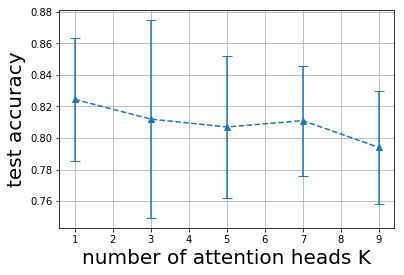

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.errorbar([1,3,5,7,9],[0.8245,0.812,0.807,0.811,0.794],[0.03901,0.0627,0.04532,0.0348,0.0360],linestyle='--', marker='^',capsize=5)
plt.xlabel("number of attention heads K",fontsize=20)
plt.ylabel("test accuracy",fontsize=20)
plt.grid()
plt.savefig('ab-choose-attention-headk.jpg')
plt.show()

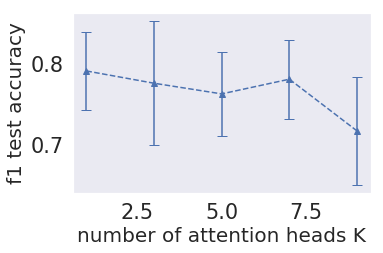

In [11]:
plt.errorbar([1,3,5,7,9],[0.7912,0.7760,0.7628321,0.781,0.717],[0.04849,0.076679,0.052028,0.0490,0.067],label=' F1 Test accuracy',linestyle='--', marker='^',capsize=5)
plt.xlabel("number of attention heads K",fontsize=20)
plt.ylabel("f1 test accuracy",fontsize=20)
plt.grid()
plt.tight_layout()
plt.savefig('ab-choose-attention-headk-f1.jpg')
plt.show()

In [28]:
test_accuracy

[0.8695652173913043,
 0.782608695652174,
 0.782608695652174,
 0.8695652173913043,
 0.8181818181818182]

In [29]:
from scipy import stats
rvs1 = [0.8260869565217391,
 0.782608695652174,
 0.7391304347826086,
 0.782608695652174,
 0.8409090909090909]
rvs2 = [0.8695652173913043,
 0.782608695652174,
 0.782608695652174,
 0.8695652173913043,
 0.8181818181818182]
stats.ttest_ind(rvs1,rvs2, equal_var = False)

Ttest_indResult(statistic=-1.1383411824498042, pvalue=0.2881145918770487)

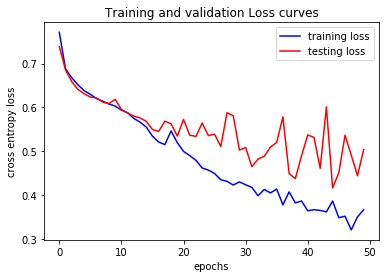

In [201]:
plt.plot(history_record[4].history['loss'],color='b',label='training loss')
plt.plot(history_record[4].history['val_loss'],color='r',label='testing loss')
plt.xlabel('epochs')
plt.ylabel('cross entropy loss')
plt.title('Training and validation Loss curves')
plt.legend()
plt.savefig('ab-loss-attention.jpg')
plt.show()

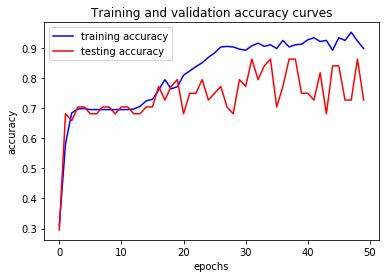

In [200]:
plt.plot(history_record[4].history['acc'],color='b',label='training accuracy')
plt.plot(history_record[4].history['val_acc'],color='r',label='testing accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training and validation accuracy curves')
plt.legend()
plt.savefig('ab-accuracy-attention.jpg')
plt.show()

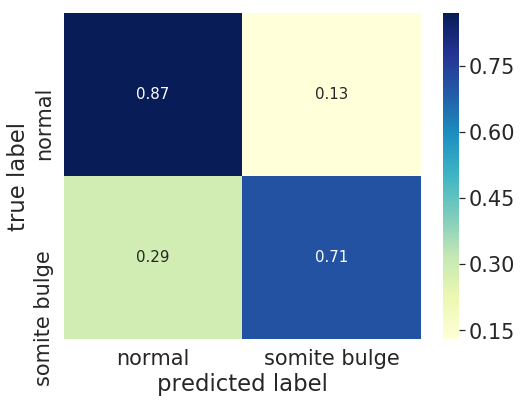

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(font_scale=1.9)

# C_sum = np.zeros(2)

# for i in range(5):    
#     with open('data-ab'+str(i)+'.pckl','rb') as file:
#         train_images,train_labels,test_images,test_labels = pickle.load(file)
#     with open('abclassification-k1'+str(i)+'.hd5','rb') as f:
#         model_weights = pickle.load(f)
#         print("loaded model")
#     model.set_weights(model_weights)
#     test_predictions = model.predict(np.array(test_images))

#     C = confusion_matrix(np.array(test_labels), (test_predictions>0.5).astype(int))
#     C_sum = C_sum + C / C.astype(np.float).sum(axis=1).reshape(2,1)
# confusion_matrix = C_sum/5
confusion_matrix = [[0.87,0.13],[0.29,0.71]]
cm_df = pd.DataFrame(confusion_matrix,
                     index = ['normal','somite bulge'], 
                     columns = ['normal','somite bulge'])

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,cmap="YlGnBu",annot_kws={"size": 15})
#plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('true label')
plt.xlabel('predicted label')
plt.savefig('ab-somite-confusion-matrix.jpg')
plt.show()

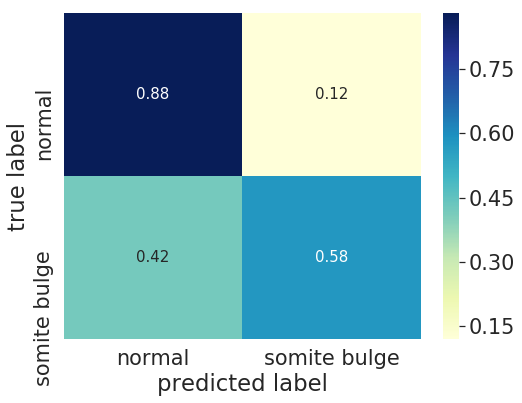

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(font_scale=1.9)

# C_sum = np.zeros(2)

# for i in range(5):    
#     with open('data-ab'+str(i)+'.pckl','rb') as file:
#         train_images,train_labels,test_images,test_labels = pickle.load(file)
#     with open('abclassification-k1'+str(i)+'.hd5','rb') as f:
#         model_weights = pickle.load(f)
#         print("loaded model")
#     model.set_weights(model_weights)
#     test_predictions = model.predict(np.array(test_images))

#     C = confusion_matrix(np.array(test_labels), (test_predictions>0.5).astype(int))
#     C_sum = C_sum + C / C.astype(np.float).sum(axis=1).reshape(2,1)
# confusion_matrix = C_sum/5
confusion_matrix = [[0.88,0.12],[0.42,0.58]]

cm_df = pd.DataFrame(confusion_matrix,
                     index = ['normal','somite bulge'], 
                     columns = ['normal','somite bulge'])

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,cmap="YlGnBu",annot_kws={"size": 15})
#plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('true label')
plt.xlabel('predicted label')
plt.savefig('ab-somite-simple-confusion-matrix.jpg')
plt.show()

In [173]:
test_accuracy

[0.8260869565217391,
 0.7608695652173914,
 0.7391304347826086,
 0.8043478260869565,
 0.8636363636363636]

Training accuracy mean 0.9322981366459627
Training accuracy var 0.004010068929157401
Testing accuracy mean 0.7988142292490119
Testing accuracy var 0.001995656860753957
Training f1 mean 0.9104162586383735
Training f1 var 0.00748042384400994
Testing f1 mean 0.719617211607687
Testing f1 var 0.005283009284983079


In [28]:
labels = 1
cnn_base = VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')

for layer in cnn_base.layers:
    #if layer.name=='block5_conv3':
        #break
    layer.trainable = False
x = cnn_base.get_layer('block5_pool').output
x = Flatten()(x)
x = Dense(64,activation='tanh')(x)
x = BatchNormalization()(x)
x = Dense(64,activation='tanh')(x)
x = BatchNormalization()(x)
x = Dense(labels,activation='sigmoid')(x)


model = Model(inputs=cnn_base.input, outputs=x)
sgd = keras.optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="binary_crossentropy", optimizer=sgd, metrics=['accuracy'])
print(model.summary())
initial_weights = model.get_weights()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [10]:
history_record = []
train_pred = []
test_pred = []

train_scores = []
test_scores = []

initial_train_scores = []
initial_test_scores = []



for i in range(5):
    print("Loading file")
    with open('data-ab'+str(i)+'.pckl','rb') as file:
        train_images,train_labels,test_images,test_labels = pickle.load(file)
    try:
        with open('ab-classification-simple-final'+str(i)+'.hd5','rb') as f:
            model_weights = pickle.load(f)
            print("loaded model")
    except:
        print("setting initial weights")
        model_weights = initial_weights
    model.set_weights(model_weights)
    print("loaded")
    class_weights = class_weight.compute_class_weight('balanced',np.unique(train_labels),train_labels)
    checkpoint = CustomModelCheckpoint('ab-classification-simple-final'+str(i)+'.hd5', monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=True,mode='max')
    earlyStopping = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=5, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
    callbacks_list = [checkpoint,earlyStopping]
    history = model.fit(x=np.array(train_images),y=np.array(train_labels),batch_size=10,epochs=50,
        validation_data=(np.array(test_images),np.array(test_labels)),callbacks=callbacks_list,class_weight=class_weights)
#     history_record.append(history)
#     train_score = model.evaluate(x=np.array(train_images),y=np.array(train_labels),batch_size=5)
#     test_score = model.evaluate(x=np.array(test_images),y=np.array(test_labels),batch_size=5)
#     train_scores.append(train_score)
#     test_scores.append(test_score)
    
#     print("predicting")
#     print("Test Score",test_score)
#     train_predictions = model.predict(x=np.array(train_images),batch_size=50)
#     test_predictions = model.predict(x=np.array(test_images),batch_size=50)
    
#     train_pred.append(train_predictions)
#     test_pred.append(test_predictions)

Loading file
setting initial weights
loaded
Train on 546 samples, validate on 46 samples
Epoch 1/50
546/546 [==============================] - 10s 19ms/step - loss: 0.6994 - acc: 0.6429 - val_loss: 0.5000 - val_acc: 0.7174

Epoch 00001: val_acc improved from -inf to 0.71739, saving model to ab-classification-simple-final0.hd5
asd
Epoch 2/50
546/546 [==============================] - 7s 13ms/step - loss: 0.4898 - acc: 0.7582 - val_loss: 0.5919 - val_acc: 0.6739

Epoch 00002: val_acc did not improve from 0.71739
Epoch 3/50
546/546 [==============================] - 7s 13ms/step - loss: 0.3891 - acc: 0.8498 - val_loss: 0.4252 - val_acc: 0.7826

Epoch 00003: val_acc improved from 0.71739 to 0.78261, saving model to ab-classification-simple-final0.hd5
asd
Epoch 4/50
546/546 [==============================] - 7s 13ms/step - loss: 0.3510 - acc: 0.8608 - val_loss: 0.4213 - val_acc: 0.8043

Epoch 00004: val_acc improved from 0.78261 to 0.80435, saving model to ab-classification-simple-final0.hd

KeyboardInterrupt: 

In [11]:
from sklearn.metrics import f1_score,accuracy_score
test_accuracy = []
train_accuracy = []

test_f1 = []
train_f1 = []

for i in range(1):
    with open('data-ab'+str(i)+'.pckl','rb') as file:
        train_images,train_labels,test_images,test_labels = pickle.load(file)
    with open('ab-classification-simple-final'+str(i)+'.hd5','rb') as f:
        model_weights = pickle.load(f)
        print("loaded model")
    model.set_weights(model_weights)
    #test_predictions = test_pred[i]
    
    test_predictions = model.predict(np.array(test_images))
    test_f1.append(f1_score(test_labels,test_predictions>0.5,average='macro'))
    test_accuracy.append(accuracy_score(test_labels,test_predictions>0.5))
    
    train_predictions = model.predict(np.array(train_images))
    train_f1.append(f1_score(train_labels,train_predictions>0.5,average='macro'))
    train_accuracy.append(accuracy_score(train_labels,train_predictions>0.5))
print("Training accuracy mean",np.mean(train_accuracy))
print("Training accuracy var",np.std(train_accuracy))

print("Testing accuracy mean",np.mean(test_accuracy))
print("Testing accuracy var",np.std(test_accuracy))

print("Training f1 mean",np.mean(train_f1))
print("Training f1 var",np.std(train_f1))

print("Testing f1 mean",np.mean(test_f1))
print("Testing f1 var",np.std(test_f1))    

loaded model
Training accuracy mean 1.0
Training accuracy var 0.0
Testing accuracy mean 0.8695652173913043
Testing accuracy var 0.0
Training f1 mean 1.0
Training f1 var 0.0
Testing f1 mean 0.8391608391608392
Testing f1 var 0.0


In [13]:
labs = []
for i in (test_predictions>0.5):
    labs.append(i[0])
idx = 0
for a,b in zip(labs,test_labels):
    idx = idx + 1
    if a!=b:
        print(idx)

3
21
22
29
33
38


0


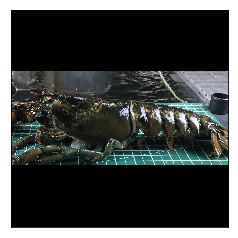

In [22]:
idx = 33
plt.imshow(test_images[idx])
plt.xticks([])
plt.yticks([])
plt.savefig("somite_incorrect_nobulge4.jpg")
print(test_labels[idx])

loaded model
loaded model
loaded model
loaded model
loaded model


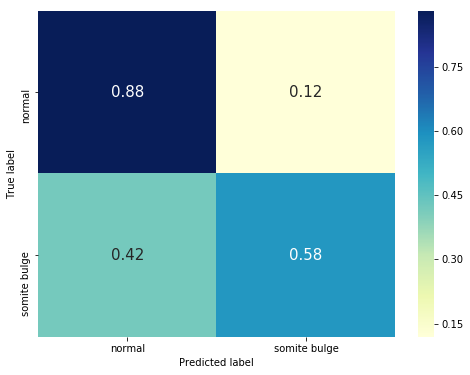

In [40]:
from sklearn.metrics import confusion_matrix

C_sum = np.zeros(2)

for i in range(1):    
    with open('data-ab'+str(i)+'.pckl','rb') as file:
        train_images,train_labels,test_images,test_labels = pickle.load(file)
    with open('ab-classification-simple-final'+str(i)+'.hd5','rb') as f:
        model_weights = pickle.load(f)
        print("loaded model")
    model.set_weights(model_weights)
    test_predictions = model.predict(np.array(test_images))

    C = confusion_matrix(np.array(test_labels), (test_predictions>0.5).astype(int))
    C_sum = C_sum + C / C.astype(np.float).sum(axis=1).reshape(2,1)
confusion_matrix = C_sum/5

cm_df = pd.DataFrame(confusion_matrix,
                     index = ['normal','somite bulge'], 
                     columns = ['normal','somite bulge'])

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,cmap="YlGnBu",annot_kws={"size": 15})
#plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('ab-somite-simple-confusion-matrix.jpg')
plt.show()

In [39]:
from scipy import stats
rvs1 = [0.8478260869565217,
 0.7391304347826086,
 0.7608695652173914,
 0.8260869565217391,
 0.7727272727272727]
rvs2 = [0.8695652173913043,
 0.782608695652174,
 0.782608695652174,
 0.8695652173913043,
 0.8181818181818182]
stats.ttest_ind(rvs1,rvs2, equal_var = False)

Ttest_indResult(statistic=-1.2441165889724821, pvalue=0.24874985918717968)